In [76]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams.update({"font.family": "Reem Kufi"})

In [77]:
df = pd.read_csv('vg_trend.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')

print(df.dtypes)
df.head()

Name                       object
Platform                   object
Year_of_Release    datetime64[ns]
Genre                      object
Publisher                  object
NA_Sales                  float64
EU_Sales                  float64
JP_Sales                  float64
Other_Sales               float64
Global_Sales              float64
Critic_Score              float64
Critic_Count              float64
User_Score                 object
User_Count                float64
Developer                  object
Rating                     object
dtype: object


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
stream = df[['Year_of_Release',
             'NA_Sales',
             'EU_Sales',
             'JP_Sales',
             'Other_Sales']].resample('1Y', on = 'Year_of_Release').sum()

stream

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
1980-12-31,10.59,0.67,0.00,0.12
1981-12-31,33.40,1.96,0.00,0.32
1982-12-31,26.92,1.65,0.00,0.31
1983-12-31,7.76,0.80,8.10,0.14
1984-12-31,33.28,2.10,14.27,0.70
1985-12-31,33.73,4.74,14.56,0.92
1986-12-31,12.50,2.84,19.81,1.93
1987-12-31,8.46,1.41,11.63,0.20
1988-12-31,23.87,6.59,15.76,0.99


Text(0, 0.5, 'Sales')

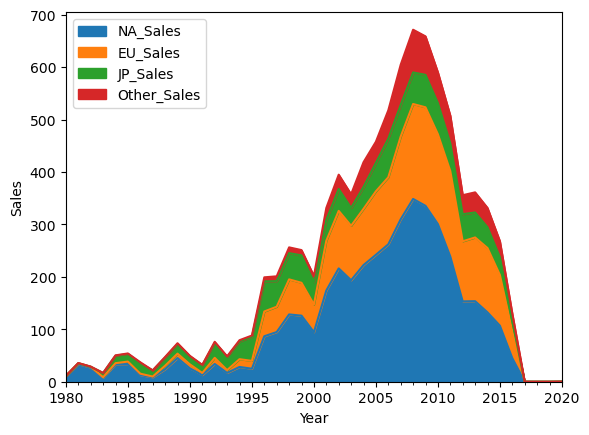

In [147]:
ax = stream.plot(kind='area', stacked=True)
ax.legend(loc = 'upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')

Text(0.5, 1.0, 'Stream Graph of sales')

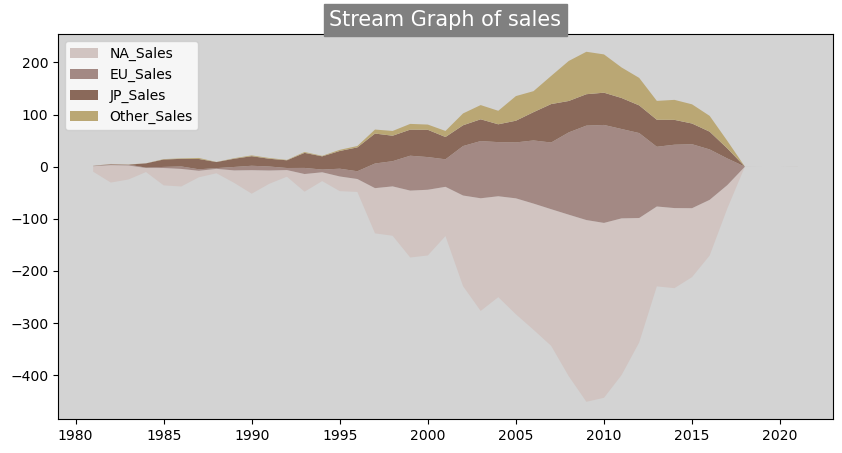

In [148]:
fig, ax = plt.subplots(figsize=(10,5))

# pal = sns.color_palette("Set3")
pal = sns.color_palette("terrain_r", 10)

ax.stackplot(stream.index,
             stream.T,
             baseline='wiggle',
             colors = pal,
             labels = stream.columns)
ax.legend(loc = 'upper left')
ax.set_facecolor('lightgrey')
plt.title("Stream Graph of sales",
          fontsize = 15,
          backgroundcolor = 'grey',
          color = 'white')
